In [2]:
import numpy as np
import pandas as pd
import pandas_market_calendars as mcal
import matplotlib.pyplot as plt
import seaborn as sns

from utils import dibuja_covar

plt.style.use('ggplot')

Vamos a generar los precios de dos activos dados por:

* valores medios
* volatilidades
* correlación

In [3]:
# Parámetros de los activos
med1 = 0.03/252  # Media del primer activo
std1 = 0.05/np.sqrt(252)  # Desviación estándar del primer activo

med2 = 0.07/252  # Media del segundo activo
std2 = 0.06/np.sqrt(252)  # Desviación estándar del segundo activo

corr12 = 0.2  # Coeficiente de correlación entre los dos activos

Definimos los días de la simulación y, usando el calendario de días hábiles, calculamos los días naturalesde la simulación.

Con los días naturales y la fecha inicial, generamos las fechas de la simulación 

In [4]:
# Número de días y simulaciones
num_dias = 1000

In [18]:
# Crear un calendario para el mercado de Estados Unidos (por ejemplo, NASDAQ)
us_cal = mcal.get_calendar('XNYS')

# Definir la fecha de inicio
start_date = pd.Timestamp('2010-01-01')


# Inicializar una variable para contar los días laborables
business_days_count = 0

# Inicializar la fecha de inicio
current_date = start_date

# Mientras no se alcance el número deseado de días laborables
while business_days_count < num_dias:
    # Verificar si la fecha actual es un día laborable
    if us_cal.valid_days(start_date=current_date, end_date=current_date).size > 0:
        business_days_count += 1
    current_date += pd.DateOffset(days=1)  # Avanzar al siguiente día natural

dias_naturales = current_date - start_date

# La variable 'current_date' ahora contiene la fecha en la que se alcanzaron los 1000 días laborables
print(f"Se necesitan {dias_naturales} días naturales para obtener {num_dias} días laborables.")

# Generar un rango de fechas de días hábiles
business_days = us_cal.valid_days(start_date=start_date, end_date=start_date + pd.DateOffset(days=dias_naturales.days))


Se necesitan 1450 days 00:00:00 días naturales para obtener 1000 días laborables.


In [ ]:
# Generar retornos diarios
np.random.seed(0)  # Fijar la semilla para reproducibilidad

# Generamos la matriz de covarianza
cov_matrix = np.array([[std1**2, corr12 * std1 * std2],
                       [corr12 * std1 * std2, std2**2]])

# Generamos los retornos
returns = np.random.multivariate_normal([med1, med2], cov_matrix, num_dias)

In [ ]:
# Creamos un DataFrame de Pandas con los retornos y las fechas como índice
returns_df = pd. DataFrame(returns, columns=['Activo 1', 'Activo 2'], index=business_days)

# Convierte el 'DatetimeIndex' en una columna 'fecha' con solo la fecha
returns_df['fecha'] = returns_df.index.date

# Luego, crea un nuevo 'DatetimeIndex' usando la columna 'fecha'
returns_df.index = pd.to_datetime(returns_df['fecha'])

# Ahora puedes eliminar la columna 'fecha' si lo deseas
returns_df.drop('fecha', axis=1, inplace=True)

returns_df.head(2)

,Activo 1,Activo 2
fecha,,
2010-01-04,0.003992,0.006121
2010-01-05,0.007772,0.001098


Comprobamos que los retornos tienen la correlación deseada

In [ ]:
print(f' El coeficiente de correlación de los retornos es {returns_df.corr().iloc[0, 1]:.4f} y el esperado es {corr12}')

 El coeficiente de correlación de los retornos es 0.1857 y el esperado es 0.2


In [ ]:
df_precios = 1 + returns_df.cumsum()
#precios_ini = np.array([117, 158])
#df_precios = precios_ini * df_precios

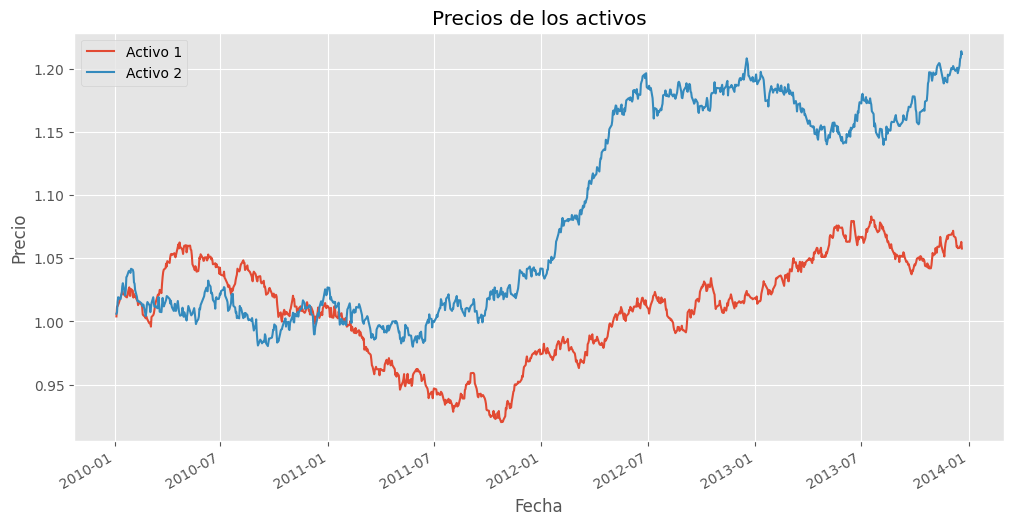

In [ ]:
#hacemos una gráfica de los precios
df_precios.plot(figsize=(12, 6))
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precios de los activos')
plt.show()


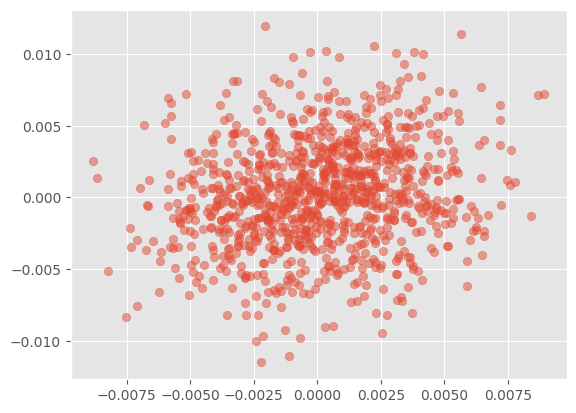

In [ ]:
plt.scatter(returns_df['Activo 1'], returns_df['Activo 2'], alpha=0.5)

In [45]:
med1 = 0.2/252
std1 = 0.3/np.sqrt(252)

med2 = 0.03/252
std2 = 0.1/np.sqrt(252)

corr12 = 0

num_dias = 1000

In [46]:
# Generar retornos diarios
np.random.seed(0)  # Fijar la semilla para reproducibilidad

# Generamos la matriz de covarianza
cov_matrix = np.array([[std1**2, corr12 * std1 * std2],
                       [corr12 * std1 * std2, std2**2]])

# Generamos los retornos
returns = np.random.multivariate_normal([med1, med2], cov_matrix, num_dias)

In [47]:
print(f' El coeficiente de correlación de los retornos es {np.corrcoef(returns[:, 0], returns[:, 1])[0, 1]:.4f} y el esperado es {corr12}')

 El coeficiente de correlación de los retornos es -0.0139 y el esperado es 0


<Axes: >

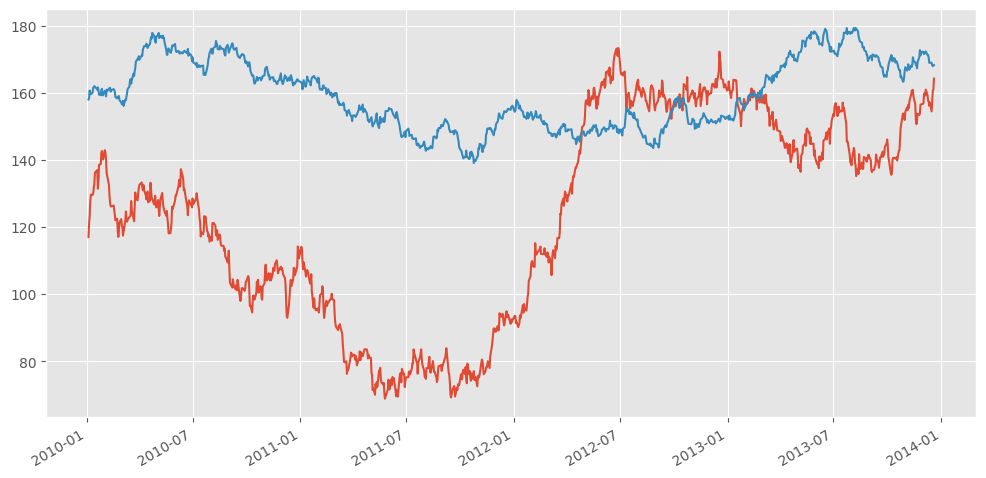

In [48]:
df_precios = 1 + returns.cumsum(axis=0)
df_precios = pd.DataFrame(df_precios, columns=['Activo 1', 'Activo 2'])

# Crear un DataFrame con una fila que tenga el valor 1 para todas las columnas
df_first_row = pd.DataFrame([[1, 1]], columns=['Activo 1', 'Activo 2'])

# Concatenar el DataFrame con la fila de valor 1 con df_precios
df_precios = pd.concat([df_first_row, df_precios]).reset_index(drop=True)

df_precios = df_precios.iloc[:-1, :]

precios_ini = np.array([117, 158])

df_precios = precios_ini * df_precios

df_precios.index = business_days




df_precios.plot(figsize=(12, 6), legend=False)

In [44]:
df_precios.to_csv('../data/precios_corr_cero.csv')

In [43]:
df_precios.corr()

,Activo 1,Activo 2
Activo 1,1.00000,0.96843
Activo 2,0.96843,1.00000


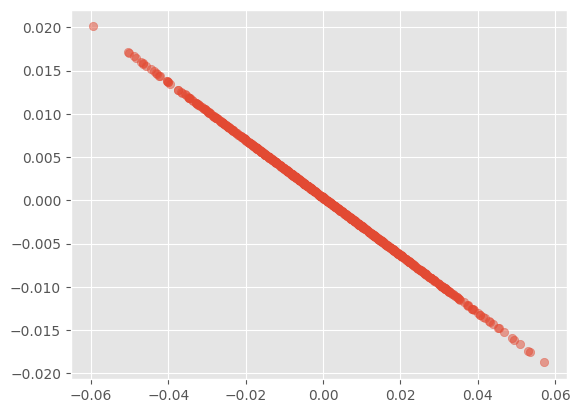

In [23]:
plt.scatter(returns[:, 0], returns[:, 1], alpha=0.5)

In [25]:
def genera_retornos(med, desv, correl, num_dias):
    """
    Genera una matriz de retornos diarios para un conjunto de activos.
    :param medias: Vector de medias anuales de los activos
    :param desviaciones: Vector de desviaciones estándar anuales de los activos
    :param correlaciones: Vector de correlaciones entre el primer activo y los demás. El primer valor debe ser 1.0
    :param num_dias: Número de días para los que se generarán los retornos
    :return: Matriz de retornos diarios
    """

        # Verificar que medias, desviaciones y correlaciones tengan la misma longitud
    if len(med) != len(desv) or len(med) != len(correl):
        raise ValueError("Las listas de medias, desviaciones y correlaciones deben tener la misma longitud.")
    
    med /= 252
    desv /= np.sqrt(252)

    # Resto del código para generar los retornos
    num_activos = len(med)
 
    # Inicializa una matriz de covarianzas vacía de dimensiones n x n
    cov_matrix = np.zeros((num_activos, num_activos))

    # Llena la diagonal principal con las varianzas de cada activo
    cov_matrix[np.arange(num_activos), np.arange(num_activos)] = desv**2

       # Llena el resto de la matriz con los productos de desviaciones y correlaciones
    for i in range(1, num_activos):
        for j in range(i):
            cov_matrix[i, j] = desv[i] * desv[0] * correl[i]
            cov_matrix[j, i] = cov_matrix[i, j]
    
    returns = np.random.multivariate_normal(med, cov_matrix, num_dias)

    return returns

In [91]:
# Número de días
num_dias = 1000

medias = np.array([0.10, -0.12, -0.05, -0.001, 0.006, 0, 0.15])

# Desviaciones estándar de cada activo (reemplaza con tus valores)
desviaciones = np.array([0.20, 0.23, 0.07, 0.1, 0.003, 0.07, 0.03])

# Valores de correlación del primer activo con los demás activos (reemplaza con tus valores)
correlaciones = np.array([1.0, -1, -0.8, -0.2, 0, 0.5, 1])

In [92]:
ret_array = genera_retornos(medias, desviaciones, correlaciones, num_dias)

/tmp/ipykernel_8460/24595609.py:33: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  returns = np.random.multivariate_normal(med, cov_matrix, num_dias)


In [93]:
columnas = []

for i in range(len(medias)):
    columnas.append(f'Activo_{i+1}')

returns_df = pd.DataFrame(ret_array, columns=columnas)

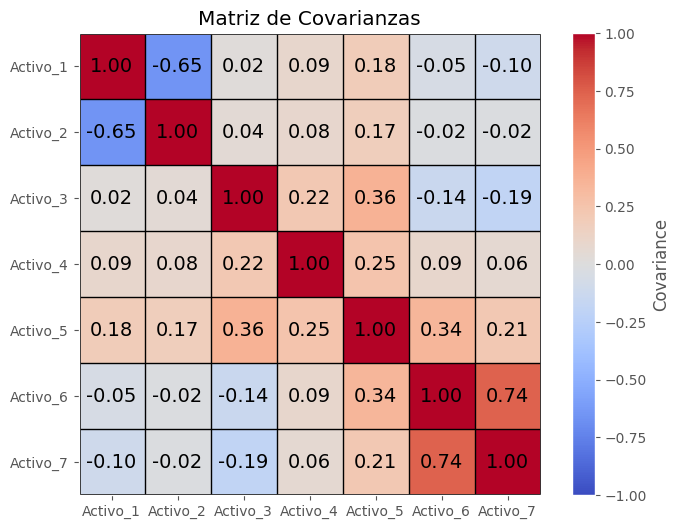

0

In [95]:
dibuja_covar(returns_df.corr())

In [96]:
precios_ini = [78, 82, 103, 98, 101, 89, 110]

df_precios = 1 + returns_df.cumsum()

df_precios = precios_ini * df_precios

df_precios.index = business_days

df_precios.index = df_precios.index.date

In [99]:
df_precios.head(2)

,Activo_1,Activo_2,Activo_3,Activo_4,Activo_5,Activo_6,Activo_7
2010-01-04,77.056232,81.677033,102.487051,98.796395,100.824610,89.825127,110.691211
2010-01-05,78.382787,80.418470,102.588313,98.861627,100.749901,89.692984,111.317387


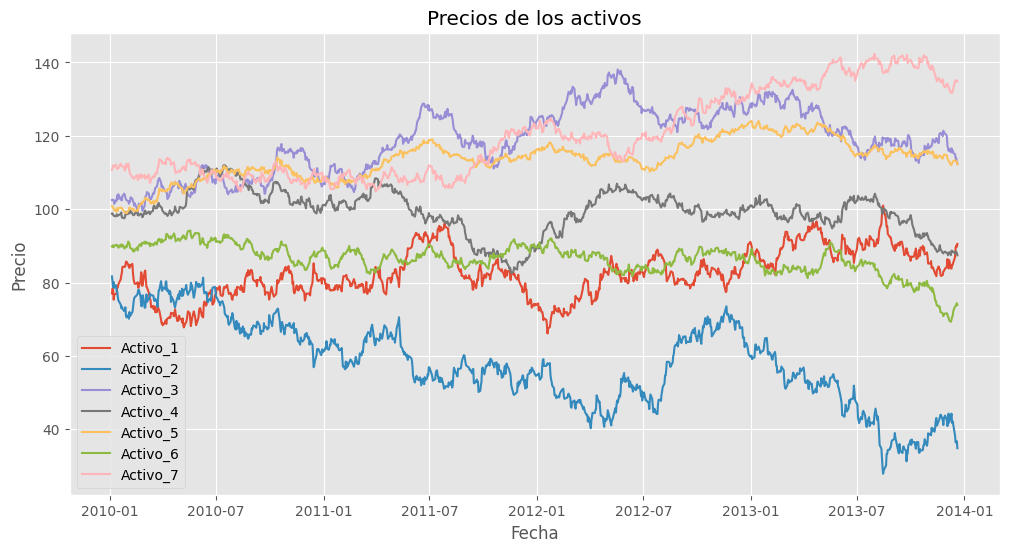

In [102]:
#hacemos una gráfica de los precios
df_precios.plot(figsize=(12, 6))
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precios de los activos')
plt.show()

# precios_ini = np.array([117, 158])
# df_precios = precios_ini * df_precios